In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

## Minimal usage of `CLASS_zdrift` to compute redshift drift observables

`CLASS_zdrift` is an adapted version of `CLASS`, fine-tuned for redshift drift cosmology applications.

---

Key features include:
- Computation of **theoretical redshift drift signal** and associated **spectroscopic velocity shift** for a given observation time interval.
- Compatibility with standard **MCMC samplers** like MontePython, Cobaya, COSMOSIS, etc., facilitating redshift drift forecasting.

---

Some notes on its utilization:
- It makes use of **standard CLASS parameters**, enabling computation of background observables for a wide range of built-in cosmologies (i.e. LCDM, wCDM, w0waCDM, curved-LCDM, specific scalar fields or any model affecting the density budget in Friedmann's equation).
- It requires a CLASS wrapper instance initialized to a specific cosmology. *In the absence of specified outputs like perturbation spectra, it focuses on computing background quantities within interpolation tables, notably redshift drift.*
- The main methods are `redshift_drift(z)` and `spectro_velocity_shift(z, delta_t)`.

---

Here is a minimal usage example of `CLASS_zdrift` for redshift drift observable computation in a Flat-LCDM cosmology scenario.


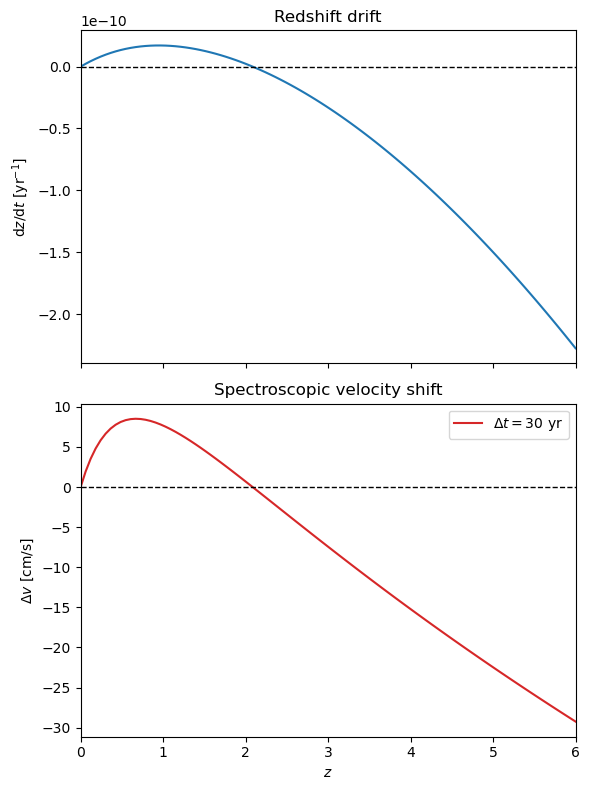

In [2]:
# Fiducial background cosmology (Flat-LCDM)
h = 0.7
Omega_m = 0.3
Omega_b = 0.022383 / h**2
Omega_k = 0.0

# Initialize the CLASS wrapper
cosmo = Class()
params = {
    "h": h,
    "Omega_b": Omega_b,
    "Omega_cdm": Omega_m - Omega_b,
    "Omega_k": Omega_k,
}
cosmo.set(params)

# Run
cosmo.compute()

# Redshift range
z = np.linspace(0.0, 6.0, 100)

# Observational time interval in years
delta_t = 30.0

# Redshift drift
zdrift = np.zeros_like(z)
for i, zz in enumerate(z):
    zdrift[i] = cosmo.redshift_drift(zz)

# Velocity shift
delta_v = np.zeros_like(z)
for i, zz in enumerate(z):
    delta_v[i] = cosmo.spectro_velocity_shift(zz, delta_t)

# Cleaning
cosmo.struct_cleanup()
cosmo.empty()

# Plot
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
axs[0].plot(z, zdrift)
axs[0].axhline(0.0, color="k", ls="--", lw=1.0)
axs[0].set_ylabel(r"$\mathrm{d}z/\mathrm{d}t$ [yr$^{-1}$]")
axs[0].set_title("Redshift drift")
axs[0].set_xlim(0.0, 6.0)
axs[1].plot(z, delta_v, c="tab:red", label=r"$\Delta t = 30$ yr")
axs[1].axhline(0.0, color="k", ls="--", lw=1.0)
axs[1].set_ylabel(r"$\Delta v$ [cm/s]")
axs[1].set_title("Spectroscopic velocity shift")
axs[1].set_xlabel(r"$z$")
axs[1].legend()
plt.tight_layout()